# Julia
## Уравнения для магнитных моментов

In [ ]:
using Pkg
Pkg.add("Plots")
Pkg.add("Latexify")
Pkg.add("LaTeXStrings")
Pkg.add("SymEngine")
Pkg.add("DifferentialEquations")

In [1]:
using DifferentialEquations

In [2]:
using Plots

In [3]:
using LinearAlgebra
× = cross
⋆ = dot

dot (generic function with 16 methods)

https://habr.com/ru/post/428984/

http://docs.juliadiffeq.org/latest/tutorials/ode_example.html

http://docs.juliadiffeq.org/latest/solvers/ode_solve.html#Runge-Kutta-Methods-for-Non-Stiff-Equations-1

$$\frac{d\vec{\mu}}{dt} = \vec{\mu}\times\gamma[\vec{H}_0 + \vec{H}_1(t)]$$

In [4]:
function lab1(μ0::Array{Float64,1}, H0::Float64, H1::Float64; ω = 5e10 )

    tspan = (0.0, 2pi) # time period
    mb = 9.27e-24
    h = 1.054e-34
    γ = 2*mb/h
    H(t) = [ H1*cos(ω*t), H1*sin(ω*t), H0 ]

    syst(μ,p,t) = γ*μ × H(t) # ODE system

    prob = ODEProblem(syst, μ0, tspan) # problem to solve
    sol = solve(prob, RK4(),dt = tspan[2]/10000. , timeseries_steps = 5000)
end
# главное правильно подобрать метод
# здесь рунгекутта с фиксированным шагом
# для жёстких систем предпочтительны методы семейства Розенброка

lab1 (generic function with 1 method)

In [ ]:
M = lab1( [0.5;0;0.9], 0.5e-11, 2e-11 )

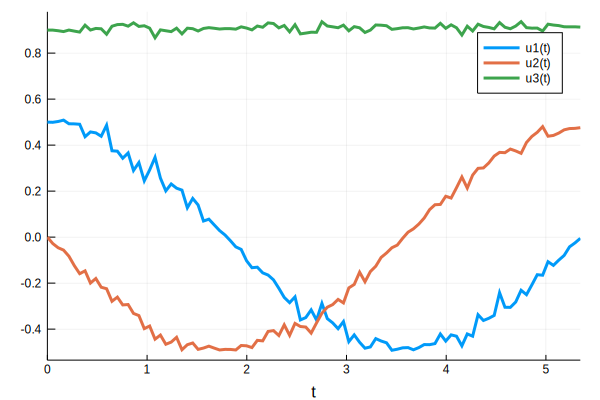

In [6]:
plot(M, plotdensity=100)

$$\frac{d\vec{M}}{dt} = \gamma\vec{M}\times\vec{H} - \frac{\vec{M}-\vec{M_0}}{\vec{T}}$$

$$ \vec{M_0} = [0, 0, \chi_0H_0] $$

$$ \vec{T} = [T_2, T_2, T_1] $$

In [7]:
function lab2(μ0::Array{Float64,1}, H1::Float64, H0::Float64; ω = 50. )

    tspan = (0.0, 2pi) # time period
    mb = 9.27*10^(-24)
    h = 1.054*10^(-34)
    γ = 2*mb/h
    χ = 1.
    T1=1
    T2=1e-4
    T = [T2, T2, T1]
    M0 = [0., 0., χ*H0]
    H(t) = [ H1*cos(ω*t), H1*sin(ω*t), H0 ]
    
    syst(M,p,t) = γ*M × H(t) - (M - M0) ./ T # ODE system

    prob = ODEProblem(syst, μ0, tspan) # problem to solve
    sol = solve(prob, RosShamp4(), dt = tspan[2]/100000., timeseries_steps = 1)
end
# RosShamp4- An A-stable 4th order Rosenbrock method.

lab2 (generic function with 1 method)

In [ ]:
M2 = lab2( [0.1, 0.1, 0.1]*1e-6, 1e-11, 1e-11 )

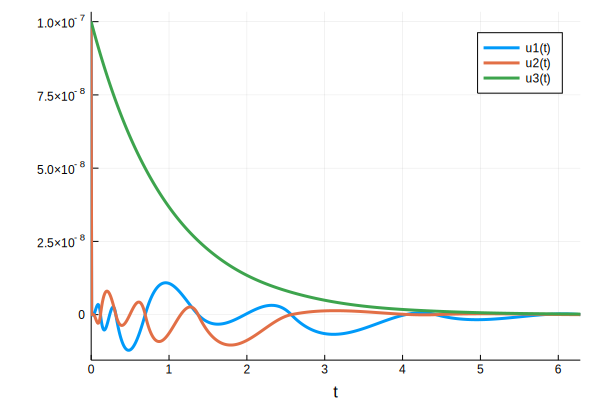

In [9]:
plot(M2)

# Lab 3

In [10]:
function lab3(μ0::Array{Float64,1}, h0::Array{Float64,1};
        Ω = 1e11, ω = 1e8, meth = RK4(), steps = 1000 )

    tspan = (0.0, 2pi) # time period
    mb = 9.27*10^(-24)
    h = 1.054*10^(-34)
    γ = 2*mb/h
    
    H(t) = h0*sin(ω*t/Ω)
    
    function syst(J,p,t)
        M = J[1:3]
        L = J[4:6]
        dM = ( M × H(t) ) - (M ⋆ L)*(M × L)
        dL = ( L × H(t) ) + (M ⋆ L)*(M × L)
        
        [dM; 0.5dL]
    end

    prob = ODEProblem(syst, μ0, tspan) # problem to solve
    sol = solve(prob, meth, dt = tspan[2]/steps)
end

lab3 (generic function with 1 method)

In [11]:
M3 = lab3( [1.,0.5,0.1,0.1,1.,0.1], [1.1,0.9,1.], 
    ω = 1e8, meth = RK4(), steps = 1000 )

retcode: Success
Interpolation: 3rd order Hermite
t: 25-element Array{Float64,1}:
 0.0                 
 0.006283185307179587
 0.057186619186235174
 0.1520870288038988  
 0.26327188934331414 
 0.40462312623422203 
 0.5816641376195453  
 0.7904597354071042  
 1.0344451111310375  
 1.3113667617460125  
 1.619488821108413   
 1.9541683320709295  
 2.310105075375229   
 2.6772178360091745  
 3.0211409182045488  
 3.3501055785308442  
 3.714852986611102   
 4.055244126786245   
 4.421807480902888   
 4.771607206489677   
 5.123091012913434   
 5.477534872445962   
 5.881595371900455   
 6.274975702550849   
 6.283185307179586   
u: 25-element Array{Array{Float64,1},1}:
 [1.0, 0.5, 0.1, 0.1, 1.0, 0.1]                                
 [1.00018, 0.500349, 0.0963589, 0.0999086, 0.999825, 0.101821] 
 [1.00101, 0.503488, 0.0668688, 0.0994943, 0.998255, 0.116565] 
 [0.99947, 0.510797, 0.0120788, 0.100273, 0.994596, 0.143957]  
 [0.992559, 0.521713, -0.0513908, 0.103744, 0.989127, 0.175684]
 [0.975

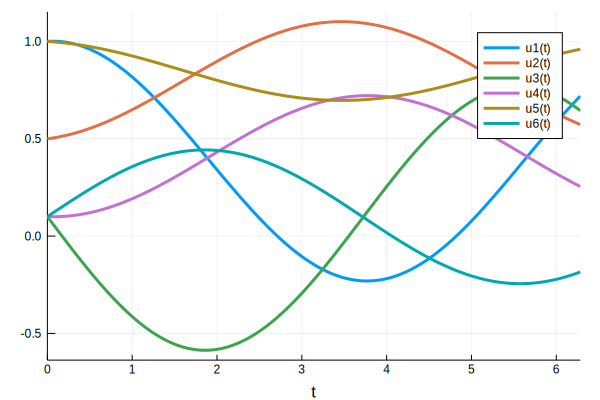

In [12]:
plot(M3)

In [13]:
Ω = 1e11
ω = 1e8
H0 = 4.6e5 # A/m
H = H0*sin.(ω/Ω*M3.t);

N = length(M3.u)
J = length(M3.u[1])

U = zeros(N, J)

for i in 1:N, j in 1:J
    U[i,j] = M3.u[i][j] # перепишем ответы в матрицу поудобней
end

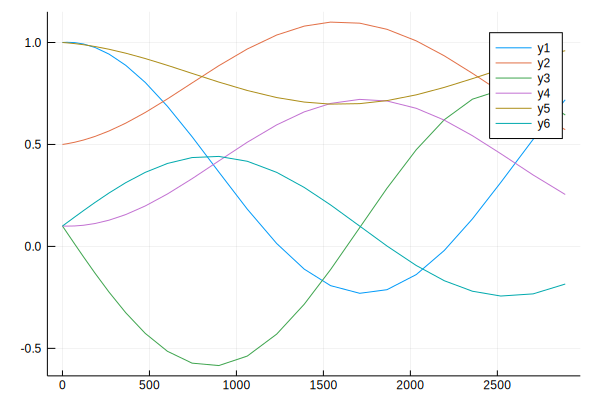

In [14]:
plot(H,U) # A/m

# lab 4

In [21]:
function lab4(μ0::Array{Float64,1}, h0::Array{Float64,1};
        Ωl = 1e11, Ωr = 7e9, ω = 1e8, meth = RK4(), steps = 1000 )

    tspan = (0.0, 2pi) # time period
    mb = 9.27*10^(-24)
    h = 1.054*10^(-34)
    γ = 2*mb/h
    
    H(t) = h0*sin(ω*t/Ωl)
    
    function syst(J,p,t)
        M = J[1:3]
        L = J[4:6]
        dM = ( M × H(t) ) - (M ⋆ L)*(M × L) - Ωr/Ωl*(M ⋆ L)^3 *(M × L)
        dL = ( L × H(t) ) + (M ⋆ L)*(M × L) + Ωr/Ωl*(M ⋆ L)^3 *(M × L)
        
        [dM; 0.5dL]
    end

    prob = ODEProblem(syst, μ0, tspan) # problem to solve
    sol = solve(prob, meth, dt = tspan[2]/steps)
end

lab4 (generic function with 1 method)

In [22]:
M4 = lab4( [1., 0.6, 0.1, 0.1, 0.5, 0.5], [0.5, 0.1, 0.], 
    ω = 1e8, meth = RK4(), steps = 1000 )

retcode: Success
Interpolation: 3rd order Hermite
t: 22-element Array{Float64,1}:
 0.0                 
 0.006283185307179587
 0.06911503837897545 
 0.20296100913271325 
 0.3661124272882909  
 0.5690194935919086  
 0.7865560885819942  
 1.025621647253596   
 1.320212506486046   
 1.64146685011382    
 1.993942074635414   
 2.3674798124774883  
 2.7424953592805146  
 3.132968793715388   
 3.610532394770395   
 4.1293953986094705  
 4.635427218765385   
 5.108844307034704   
 5.433397877167347   
 5.726906103657869   
 6.096597723175161   
 6.283185307179586   
u: 22-element Array{Array{Float64,1},1}:
 [1.0, 0.6, 0.1, 0.1, 0.5, 0.5]                                  
 [0.999281, 0.601406, 0.0987403, 0.10036, 0.499297, 0.50063]     
 [0.991807, 0.615516, 0.0863695, 0.104096, 0.492243, 0.506815]   
 [0.974222, 0.645846, 0.0614327, 0.112888, 0.47708, 0.519279]    
 [0.949832, 0.683139, 0.0337859, 0.125082, 0.45844, 0.533092]    
 [0.91522, 0.729628, 0.00389664, 0.142385, 0.435209, 0.548014] 

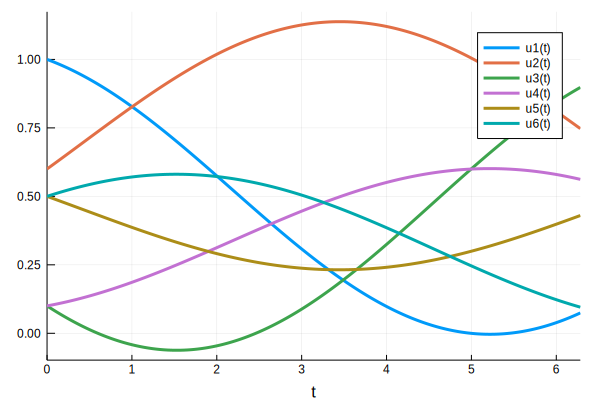

In [23]:
plot(M4)

# lab 5

In [25]:
function lab5(μ0::Array{Float64,1}, h0::Array{Float64,1};
        Ωl = 1e11, Ωr = 7e9, ω = 1e8, meth = RK4(), steps = 1000 )

    tspan = (0.0, 2pi) # time period
    mb = 9.27*10^(-24)
    h = 1.054*10^(-34)
    γ = 2*mb/h
    
    H(t) = h0*sin(ω*t/Ωl)
    
    syst(J,p,t) = ( J × H(t) ) - Ωr/Ωl*(J.^3 × J)

    prob = ODEProblem(syst, μ0, tspan) # problem to solve
    sol = solve(prob, meth, dt = tspan[2]/steps)
end

lab5 (generic function with 1 method)

In [ ]:
?deg2rad

In [28]:
θ = deg2rad(110)
M5 = lab5( [0., 0.91*sin(θ), 0.91*cos(θ)], [0., 0., 10.], 
    ω = 1e11, meth = RK4(), steps = 1000 )


retcode: Success
Interpolation: 3rd order Hermite
t: 143-element Array{Float64,1}:
 0.0                 
 0.006283185307179587
 0.01741258066868143 
 0.03214191116484865 
 0.05300153827268406 
 0.07913868552301637 
 0.1109978024036789  
 0.14785212376121493 
 0.18944555048280012 
 0.2352145129572777  
 0.284825625752008   
 0.33798923031510114 
 0.3945143369120408  
 ⋮                   
 5.69120014673133    
 5.7382953468854     
 5.780196685779454   
 5.827516371347129   
 5.878233047796318   
 5.934056329548399   
 5.993740809572053   
 6.055678446111191   
 6.1190549041401985  
 6.184158051708412   
 6.251711742966345   
 6.283185307179586   
u: 143-element Array{Array{Float64,1},1}:
 [0.0, 0.85512, -0.311238]        
 [0.00024305, 0.85512, -0.311238] 
 [0.00150211, 0.855119, -0.311238]
 [0.00479659, 0.855108, -0.311236]
 [0.012634, 0.855031, -0.311228]  
 [0.0276942, 0.854684, -0.311206] 
 [0.0538991, 0.853452, -0.31115]  
 [0.0948456, 0.849919, -0.311034] 
 [0.154373, 0.841225, -

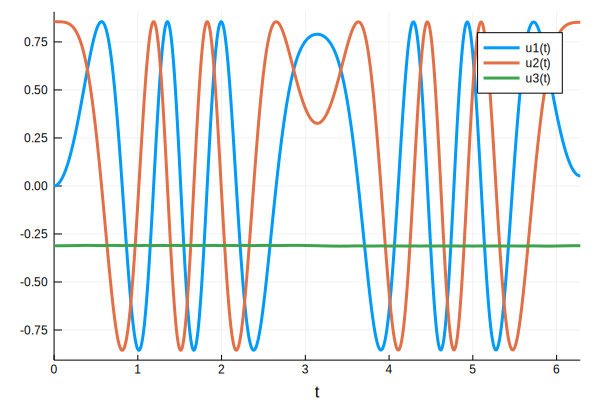

In [29]:
plot(M5)

# for labs 5-7

In [ ]:
using Pkg
Pkg.add("Latexify")
Pkg.add("LaTeXStrings")
Pkg.add("SymEngine")

In [178]:
using Latexify, LaTeXStrings, Plots, SymEngine

https://github.com/symengine/SymEngine.jl

https://github.com/chakravala/Reduce.jl  
https://chakravala.github.io/Reduce.jl/latest/  
https://github.com/JuliaPy/SymPy.jl/blob/master/examples/tutorial.md  

https://korsbo.github.io/Latexify.jl/stable/arguments.html
https://github.com/korsbo/Latexify.jl


https://github.com/stevengj/LaTeXStrings.jl

In [179]:
u = [symbols("u_xx") 0 0
0 symbols("u_yy") 0
0 0 symbols("u_zz")]

3×3 Array{Basic,2}:
 u_xx     0     0
    0  u_yy     0
    0     0  u_zz

In [180]:
u |> latexify

L"\begin{equation}
\left[
\begin{array}{ccc}
u_{xx} & 0 & 0 \\ 
0 & u_{yy} & 0 \\ 
0 & 0 & u_{zz} \\ 
\end{array}
\right]
\end{equation}
"

In [181]:
a = C = symbols("α")
C = symbols("Ω_b/Ω_l")
J  = [symbols("J_$i") for i in ['x','y','z'] ]
dJ  = [symbols("dJ_$i") for i in ['x','y','z'] ]
h  = [0, 0, symbols("h_z")]

3-element Array{Basic,1}:
   0
   0
 h_z

In [182]:
latexify(J×h, transpose = true)

L"\begin{equation}
\left[
\begin{array}{c}
J_{y} \cdot h_{z} \\ 
 - J_{x} \cdot h_{z} \\ 
0 \\ 
\end{array}
\right]
\end{equation}
"

In [183]:
dJ = C*(u*J.^3)×h
latexify( dJ, transpose = true)

L"\begin{equation}
\left[
\begin{array}{c}
\frac{J_{y}^{3} \cdot h_{z} \cdot u_{yy} \cdot Ω_{b}}{Ω_{l}} \\ 
\frac{ - J_{x}^{3} \cdot h_{z} \cdot u_{xx} \cdot Ω_{b}}{Ω_{l}} \\ 
0 \\ 
\end{array}
\right]
\end{equation}
"

левая часть:

In [184]:
L = dJ + a*dJ×J
latexify(L, transpose = true)

L"\begin{equation}
\left[
\begin{array}{c}
\frac{J_{y}^{3} \cdot h_{z} \cdot u_{yy} \cdot Ω_{b}}{Ω_{l}} - \frac{α \cdot J_{z} \cdot J_{x}^{3} \cdot h_{z} \cdot u_{xx} \cdot Ω_{b}}{Ω_{l}} \\ 
\frac{ - J_{x}^{3} \cdot h_{z} \cdot u_{xx} \cdot Ω_{b}}{Ω_{l}} - \frac{α \cdot J_{z} \cdot J_{y}^{3} \cdot h_{z} \cdot u_{yy} \cdot Ω_{b}}{Ω_{l}} \\ 
\frac{α \cdot J_{x}^{4} \cdot h_{z} \cdot u_{xx} \cdot Ω_{b}}{Ω_{l}} + \frac{α \cdot J_{y}^{4} \cdot h_{z} \cdot u_{yy} \cdot Ω_{b}}{Ω_{l}} \\ 
\end{array}
\right]
\end{equation}
"

Выделим матрицу коэффициентов

In [185]:
A = [1 a*J[3] -a*J[2]; -a*J[3] 1 a*J[1]; a*J[2] -a*J[1] 1]
latexify(A)

L"\begin{equation}
\left[
\begin{array}{ccc}
1 & α \cdot J_{z} &  - α \cdot J_{y} \\ 
 - α \cdot J_{z} & 1 & α \cdot J_{x} \\ 
α \cdot J_{y} &  - α \cdot J_{x} & 1 \\ 
\end{array}
\right]
\end{equation}
"

In [186]:
# проверка
latexify( A*dJ, transpose = true)

L"\begin{equation}
\left[
\begin{array}{c}
\frac{J_{y}^{3} \cdot h_{z} \cdot u_{yy} \cdot Ω_{b}}{Ω_{l}} - \frac{α \cdot J_{z} \cdot J_{x}^{3} \cdot h_{z} \cdot u_{xx} \cdot Ω_{b}}{Ω_{l}} \\ 
\frac{ - J_{x}^{3} \cdot h_{z} \cdot u_{xx} \cdot Ω_{b}}{Ω_{l}} - \frac{α \cdot J_{z} \cdot J_{y}^{3} \cdot h_{z} \cdot u_{yy} \cdot Ω_{b}}{Ω_{l}} \\ 
\frac{α \cdot J_{x}^{4} \cdot h_{z} \cdot u_{xx} \cdot Ω_{b}}{Ω_{l}} + \frac{α \cdot J_{y}^{4} \cdot h_{z} \cdot u_{yy} \cdot Ω_{b}}{Ω_{l}} \\ 
\end{array}
\right]
\end{equation}
"

In [ ]:
A^-1 # обратная матрица

$$
\frac{d\vec{J}}{d\tau} + \alpha\left[ \frac{d\vec{J}}{d\tau}\times\vec{J} \right] = \left[\vec{J}\times\vec{h} \right] - \frac{\Omega_b}{\Omega_l}\left[\vec{J}^{(3)}\times\vec{J} \right] - \frac{\Omega_b}{\Omega_l}\left[\left(\hat{u}\vec{J}^{(3)}\right )\times\vec{J}\right] + \frac{115\Omega_b}{4\Omega_l}\left[\left(\hat{u}\vec{J}\right)\times\vec{J} \right]
$$

Правая часть

In [187]:
R = J×h - C*( J.^3×J - (u*J.^3)×J + 115/4*(u*J)×J )
latexify( R, transpose = true)

L"\begin{equation}
\left[
\begin{array}{c}
J_{y} \cdot h_{z} - \frac{\left( J_{z} \cdot J_{y}^{3} - J_{z}^{3} \cdot J_{y} + 28.75 \cdot J_{z} \cdot J_{y} \cdot u_{yy} - 28.75 \cdot J_{z} \cdot J_{y} \cdot u_{zz} - \left( J_{z} \cdot J_{y}^{3} \cdot u_{yy} - J_{z}^{3} \cdot J_{y} \cdot u_{zz} \right) \right) \cdot Ω_{b}}{Ω_{l}} \\ 
 - J_{x} \cdot h_{z} - \frac{\left(  - J_{z} \cdot J_{x}^{3} + J_{z}^{3} \cdot J_{x} - 28.75 \cdot J_{z} \cdot J_{x} \cdot u_{xx} + 28.75 \cdot J_{z} \cdot J_{x} \cdot u_{zz} - \left(  - J_{z} \cdot J_{x}^{3} \cdot u_{xx} + J_{z}^{3} \cdot J_{x} \cdot u_{zz} \right) \right) \cdot Ω_{b}}{Ω_{l}} \\ 
\frac{ - \left( J_{y} \cdot J_{x}^{3} - J_{y}^{3} \cdot J_{x} + 28.75 \cdot J_{y} \cdot J_{x} \cdot u_{xx} - 28.75 \cdot J_{y} \cdot J_{x} \cdot u_{yy} - \left( J_{y} \cdot J_{x}^{3} \cdot u_{xx} - J_{y}^{3} \cdot J_{x} \cdot u_{yy} \right) \right) \cdot Ω_{b}}{Ω_{l}} \\ 
\end{array}
\right]
\end{equation}
"

Правая часть помноженная на обратную матрицу

In [188]:
EQ = A^-1 * R;

In [ ]:
latexify(EQ[1]) # первое уравнение из трех

In [190]:
EQ[1]

(-J_x*h_z - (-J_z*J_x^3 + J_z^3*J_x - 28.75*J_z*J_x*u_xx + 28.75*J_z*J_x*u_zz - (-J_z*J_x^3*u_xx + J_z^3*J_x*u_zz))*Ω_b/Ω_l)*(-α*J_z*(1 + (-α*J_x - α^2*J_z*J_y)*(α*J_x - α^2*J_z*J_y)/((1 + α^2*J_y^2 - (-α*J_x - α^2*J_z*J_y)*(α*J_x - α^2*J_z*J_y)/(1 + α^2*J_z^2))*(1 + α^2*J_z^2)))/(1 + α^2*J_z^2) - α*J_y*(-α*J_x - α^2*J_z*J_y)/((1 + α^2*J_y^2 - (-α*J_x - α^2*J_z*J_y)*(α*J_x - α^2*J_z*J_y)/(1 + α^2*J_z^2))*(1 + α^2*J_z^2))) + (1 + α*J_y*(-α*J_y - α*J_z*(-α*J_x - α^2*J_z*J_y)/(1 + α^2*J_z^2))/(1 + α^2*J_y^2 - (-α*J_x - α^2*J_z*J_y)*(α*J_x - α^2*J_z*J_y)/(1 + α^2*J_z^2)) - α*J_z*(α*J_z - (-α*J_y - α*J_z*(-α*J_x - α^2*J_z*J_y)/(1 + α^2*J_z^2))*(α*J_x - α^2*J_z*J_y)/(1 + α^2*J_y^2 - (-α*J_x - α^2*J_z*J_y)*(α*J_x - α^2*J_z*J_y)/(1 + α^2*J_z^2)))/(1 + α^2*J_z^2))*(J_y*h_z - (J_z*J_y^3 - J_z^3*J_y + 28.75*J_z*J_y*u_yy - 28.75*J_z*J_y*u_zz - (J_z*J_y^3*u_yy - J_z^3*J_y*u_zz))*Ω_b/Ω_l) - (α*J_y/(1 + α^2*J_y^2 - (-α*J_x - α^2*J_z*J_y)*(α*J_x - α^2*J_z*J_y)/(1 + α^2*J_z^2)) + α*J_z*(α*J_x - α^2*J_z

# for Scilab

In [191]:
u = [symbols("u_xx") 0 0
0 symbols("u_yy") 0
0 0 symbols("u_zz")]

3×3 Array{Basic,2}:
 u_xx     0     0
    0  u_yy     0
    0     0  u_zz

In [ ]:
u = [0 0 0
0 0 0
0 0 symbols("u_zz")]

In [ ]:
a = C = symbols("a")
C = symbols("OB/OL")
h  = [0, 0, symbols("h_z")]
dJ  = [symbols("dJdt($i)") for i in 1:3 ]
J  = [symbols("J($i)") for i in 1:3 ]

In [ ]:
C*(u*J.^3)×h

In [ ]:
A = [1 a*J[3] -a*J[2]; -a*J[3] 1 a*J[1]; a*J[2] -a*J[1] 1]

In [ ]:
# R = J×h - C*( J.^3×J - (u*J.^3)×J + 115/4*(u*J)×J )
R = J×h - C*( J.^3×J )

In [ ]:
EQ = A^-1 * R

Сцылаб
```julia

//3//
function [dS]=syst(t,S)
dS=zeros (6,1);
dS(1)=(S(2)*ho(3)*sin(phi) - S(3)*ho(2)*sin(phi)) - (S(1)*S(4) + S(2)*S(5) + S(3)*S(6))*(S(2)*S(6) - S(3)*S(5));
dS(2)=(S(3)*ho(1)*sin(phi) - S(1)*ho(3)*sin(phi)) - (S(1)*S(4) + S(2)*S(5) + S(3)*S(6))*(S(3)*S(4) - S(1)*S(6));
dS(3)=(S(1)*ho(2)*sin(phi)-S(2)*ho(1)*sin(phi))-(S(1)*S(4)+S(2)*S(5)+S(3)*S(6))*(S(1)*S(5)-S(2)*S(4));
dS(4)=(S(5)*ho(3)*sin(phi)-S(6)*ho(2)*sin(phi))*0.5+(S(1)*S(4)+S(2)*S(5)+S(3)*S(6))*(S(2)*S(6)-S(3)*S(5))*0.5;
dS(5)=(S(6)*ho(1)*sin(phi)-S(4)*ho(3)*sin(phi))*0.5+(S(1)*S(4)+S(2)*S(5)+S(3)*S(6))*(S(3)*S(4)-S(1)*S(6))*0.5;
dS(6)=(S(4)*ho(2)*sin(phi)-S(5)*ho(1)*sin(phi))*0.5+(S(1)*S(4)+S(2)*S(5)+S(3)*S(6))*(S(1)*S(5)+S(2)*S(4))*0.5;
endfunction
phi = 110.0 * %pi/180.0; 
h0 = 4.6e+5;
O = 1.0e+8; 
OL = 1.0e+11; 
ho=[1.1;0.9;1];
//ho=[0.1;0.1;0.1];
MLo=[0; 1; 0; 0; 1.1; 0.7];
t=0:0.0001:5;
h = h0*sin(t*O/OL);
y=ode("adams",MLo,0,t,syst)
Mx = y(1,:);
My = y(2,:);
Mz = y(3,:);
Lx = y(4,:);
Ly = y(5,:);
Lz = y(6,:);
//plot(t,y)
subplot(221)
plot(t,Mx,t,My,t,Mz)
subplot(222)
plot(t,Lx,t,Ly,t,Lz)
subplot(223)
plot(h,Mx,h,My,h,Mz)

    
    
//4//
function [dS]=syst(t,S)
dS=zeros (6,1);
dS(1)=(S(2)*ho(3)*sin(phi) - S(3)*ho(2)*sin(phi)) - (S(1)*S(4) + S(2)*S(5) + S(3)*S(6))*(S(2)*S(6) - S(3)*S(5)) - (Ql/Qt)*(S(1)*S(4) + S(2)*S(5) + S(3)*S(6)).^3*(S(2)*S(6) - S(3)*S(5));;
dS(2)=(S(3)*ho(1)*sin(phi) - S(1)*ho(3)*sin(phi)) - (S(1)*S(4) + S(2)*S(5) + S(3)*S(6))*(S(3)*S(4) - S(1)*S(6)) - (Ql/Qt)*(S(1)*S(4) + S(2)*S(5) + S(3)*S(6))*(S(3)*S(4) - S(1)*S(6));
dS(3)=(S(1)*ho(2)*sin(phi)-S(2)*ho(1)*sin(phi)) - (S(1)*S(4)+S(2)*S(5)+S(3)*S(6))*(S(1)*S(5)-S(2)*S(4)) - (Ql/Qt)*(S(1)*S(4)+S(2)*S(5)+S(3)*S(6))*(S(1)*S(5)-S(2)*S(4));
dS(4)=(S(5)*ho(3)*sin(phi)-S(6)*ho(2)*sin(phi))*0.5+(S(1)*S(4)+S(2)*S(5)+S(3)*S(6))*(S(2)*S(6)-S(3)*S(5))*0.5 - (Ql/Qt)*(S(1)*S(4)+S(2)*S(5)+S(3)*S(6))*(S(2)*S(6)-S(3)*S(5))*0.5;
dS(5)=(S(6)*ho(1)*sin(phi)-S(4)*ho(3)*sin(phi))*0.5+(S(1)*S(4)+S(2)*S(5)+S(3)*S(6))*(S(3)*S(4)-S(1)*S(6))*0.5 - (Ql/Qt)*(S(1)*S(4)+S(2)*S(5)+S(3)*S(6))*(S(3)*S(4)-S(1)*S(6))*0.5;
dS(6)=(S(4)*ho(2)*sin(phi)-S(5)*ho(1)*sin(phi))*0.5+(S(1)*S(4)+S(2)*S(5)+S(3)*S(6))*(S(1)*S(5)+S(2)*S(4))*0.5 - (Ql/Qt)*(S(1)*S(4)+S(2)*S(5)+S(3)*S(6))*(S(1)*S(5)+S(2)*S(4))*0.5;
endfunction
phi = 110.0 * %pi/180.0; 
h0 = 4.6e+5;
O = 1.0e+8; 
OL = 1.0e+11; 
Ql = 10e+11;
Qt = 7e+9;
ho=[1.1;0.9;1];
MLo=[0; 1; 0; 0; 1.1; 0.7];
t=0:0.0001:0.1;
h = h0*sin(t*O/OL);
y=ode("adams",MLo,0,t,syst)
Mx = y(1,:);
My = y(2,:);
Mz = y(3,:);
Lx = y(4,:);
Ly = y(5,:);
Lz = y(6,:);
//plot(t,y)
subplot(221)
plot(t,Mx,t,My,t,Mz)
subplot(222)
plot(t,Lx,t,Ly,t,Lz)
subplot(223)
plot(h,Mx,h,My,h,Mz)

        
        
//5//
function c=vekt(a, b)//векторное умножение 
c(1) = a(2)*b(3) - a(3)*b(2); 
c(2) = a(3)*b(1) - a(1)*b(3); 
c(3) = a(1)*b(2) - b(1)*a(2); 
endfunction 

function dJdt = eqs(t, J, h0) 
Ho = [0; 0; h0];//переменное поле 
H = Ho*sin(t*O/OL); 

dJdt = (vekt(J, H) - ( OB/ OL)*vekt(J.^3, J)); 
endfunction 

//глобальные переменные 
  h0 =800; 
O = 1.5e+2; 
OL = 1.0e+1; 
OB = 1.5e+2; 
jz0 = 0.9; 
otrz = 1000;//колличество отрезков разбиения 
phi = 110.0 * %pi/180.0; 
Jo = [ jz0*sin(phi); jz0*cos(phi);0.0];

//t = linspace(0, 4*%pi* OL/O, otrz);//время действия поля 
t = 0:0.0001:0.3;
Jvec = ode("adams", Jo, 0, t, list(eqs, h0));//метод Адамса 
//'stiff' – Backward differentiation formula 
tmp = Jvec(3,:); 
jz = tmp(1:1:$); 
hz = h0*sin(t*O/OL); 
//set("current_figure", 0); 
plot(hz, jz); 
//plot(t,Jvec);
//comet(hz, jz, "colors", 2);//график 
xtitle ("Jz(t)","H","Jz");
   
                
                
//6//           

clear

function c=vekt(a, b)//векторное умножение 
c(1) = a(2)*b(3) - a(3)*b(2); 
c(2) = a(3)*b(1) - a(1)*b(3); 
c(3) = a(1)*b(2) - a(2)*b(1); 
endfunction 

function [dJdt]=eqs2(t, J, h0) 

H = [0; 0; h0]*sin(t*O/OL); 

A = ([1.0, a*J(3), -a*J(2); 
-a*J(3),1.0, a*J(1); 
 a*J(2), -a*J(1), 1.0]);

dJdt = A^(-1)*(vekt(J, H) - ( OB/ OL)*( vekt(J.^3, J) )  ); 

//dJdt = A^(-1)*(vekt(J, H) - ( OB/ OL)*( vekt(J.^3, J) - vekt(u*J.^3, J) + 28.75*vekt(u*J, J) )  ); 
endfunction 



function [dJdt]=eqs3(t, J, h0) 
    h_z = h0*sin(t*O/OL); 
    
    dJdt = zeros(3,1)
       
    dJdt(1) = (-a*J(3)*(1 + (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/((1 + a^2*J(3)^2)*(1 + a^2*J(2)^2 - (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2))))/(1 + a^2*J(3)^2) - a*J(2)*(-a*J(1) - a^2*J(2)*J(3))/((1 + a^2*J(3)^2)*(1 + a^2*J(2)^2 - (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2))))*(-h_z*J(1) - (J(1)*J(3)^3 - J(1)^3*J(3))*OB/OL) + (1 + a*J(2)*(-a*J(2) - a*J(3)*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2))/(1 + a^2*J(2)^2 - (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2)) - a*J(3)*(a*J(3) - (a*J(1) - a^2*J(2)*J(3))*(-a*J(2) - a*J(3)*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2))/(1 + a^2*J(2)^2 - (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2)))/(1 + a^2*J(3)^2))*(h_z*J(2) - (-J(2)*J(3)^3 + J(2)^3*J(3))*OB/OL) - (-J(1)*J(2)^3 + J(1)^3*J(2))*OB/OL*(a*J(2)/(1 + a^2*J(2)^2 - (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2)) + a*J(3)*(a*J(1) - a^2*J(2)*J(3))/((1 + a^2*J(3)^2)*(1 + a^2*J(2)^2 - (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2))))
    
    dJdt(2) = (h_z*J(2) - (-J(2)*J(3)^3 + J(2)^3*J(3))*OB/OL)*(a*J(3) - (a*J(1) - a^2*J(2)*J(3))*(-a*J(2) - a*J(3)*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2))/(1 + a^2*J(2)^2 - (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2)))/(1 + a^2*J(3)^2) + (1 + (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/((1 + a^2*J(3)^2)*(1 + a^2*J(2)^2 - (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2))))*(-h_z*J(1) - (J(1)*J(3)^3 - J(1)^3*J(3))*OB/OL)/(1 + a^2*J(3)^2) + (-J(1)*J(2)^3 + J(1)^3*J(2))*OB/OL*(a*J(1) - a^2*J(2)*J(3))/((1 + a^2*J(3)^2)*(1 + a^2*J(2)^2 - (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2)))
    
    dJdt(3) = -(-J(1)*J(2)^3 + J(1)^3*J(2))*OB/OL/(1 + a^2*J(2)^2 - (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2)) + (h_z*J(2) - (-J(2)*J(3)^3 + J(2)^3*J(3))*OB/OL)*(-a*J(2) - a*J(3)*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2))/(1 + a^2*J(2)^2 - (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2)) - (-h_z*J(1) - (J(1)*J(3)^3 - J(1)^3*J(3))*OB/OL)*(-a*J(1) - a^2*J(2)*J(3))/((1 + a^2*J(3)^2)*(1 + a^2*J(2)^2 - (a*J(1) - a^2*J(2)*J(3))*(-a*J(1) - a^2*J(2)*J(3))/(1 + a^2*J(3)^2)))
    
endfunction 

//глобальные переменные 
h0 = 10000.0; 
O = 1.5e+2;
 
OL = 1.0e+2 ; 
 OB = 1.5e+3; 

u = [0 0 0
0 0 0
0 0 1]

jz0 = 0.91; 
a = 0.5; 
otrz = 1000;//колличество отрезков разбиения 
phi = 110.0 *%pi/180.0; 
Jo=[0.0;jz0*sin(phi); jz0*cos(phi)];
//Jo = [ jz0*sin(phi); jz0*cos(phi); 0.0]; 

time = 0:0.0001:7;
Jvec = ode("adams", Jo, 0,time, list(eqs3, h0))
//Jvec = ode("adams", Jo, 0,time, list(eqs2, h0))
tmp = Jvec(3,:); 
jz = tmp(1:1:$); 
jz=-jz;
 h=h0*sin(time*O/OL); 
plot(h, jz);

//xtitle ("Jz(t)","H","Jz");
```